# Networks using Pytorch Layers and Optimizers
### For manually created NNs go to the other jupyter notebooks

In [5]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Basic NN

In [16]:
x_train = np.array ([[4.7], [2.4], [7.5], [7.1], [4.3], 
                     [7.8], [8.9], [5.2], [4.59], [2.1], 
                     [8], [5], [7.5], [5], [4],
                     [8], [5.2], [4.9], [3], [4.7], 
                     [4], [4.8], [3.5], [2.1], [4.1]],
                    dtype = np.float32)

y_train = np.array ([[2.6], [1.6], [3.09], [2.4], [2.4], 
                     [3.3], [2.6], [1.96], [3.13], [1.76], 
                     [3.2], [2.1], [1.6], [2.5], [2.2], 
                     [2.75], [2.4], [1.8], [1], [2], 
                     [1.6], [2.4], [2.6], [1.5], [3.1]], 
                    dtype = np.float32)

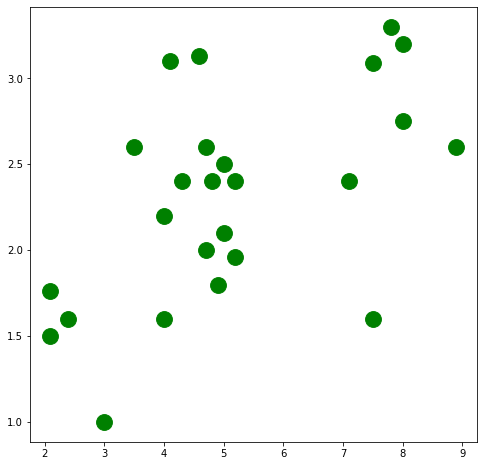

In [17]:
plt.figure(figsize=(8,8))

plt.scatter(x_train, y_train, c='green', s=250, label='Original data')

plt.show()

In [18]:
x = torch.from_numpy(x_train) 
y = torch.from_numpy(y_train)

inp = 1
hidden = 5
out = 1

In [19]:
# Model using Optimizer Objects
model = torch.nn.Sequential(
        torch.nn.Linear(inp, hidden),
        torch.nn.ReLU(),
        torch.nn.Linear(hidden, out))

# Specify loss function
loss_fn = torch.nn.MSELoss(reduction='sum')

In [22]:
learning_rate = 1e-4

optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

for i in range(500):
    
    y_pred = model(x) # Set up Pytorch relationships

    loss = loss_fn(y_pred, y) 
    #print(i, loss.item()) #.item gets the value directly
    
    optimizer.zero_grad() # Reset Grads
    loss.backward() 
     
    ''' When not using optimizers (they take care of the updates)
    with torch.no_grad(): # you don't want to screw up the update w/o no_grad
        for param in model.parameters(): #Accessing model parameters
            param -= learning_rate * param.grad
    '''
    optimizer.step()


In [23]:
predicted_in_tensor = model(x)# Predicted
predicted = predicted_in_tensor.detach().numpy() # Get numpy to graph

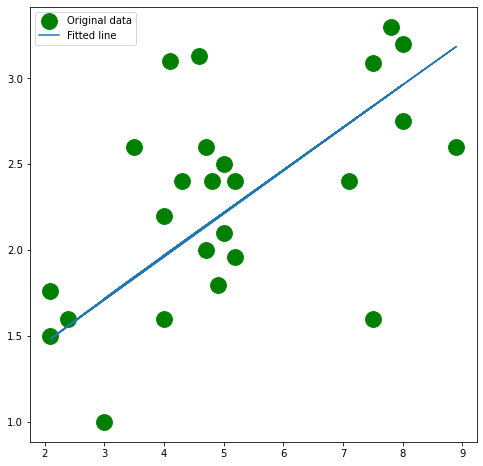

In [24]:
plt.figure(figsize=(8,8))

plt.scatter(x_train, y_train, c='green', s=250, label='Original data')

plt.plot(x_train, predicted, label = 'Fitted line ')

plt.legend() 

plt.show()

## Fully Connected NN with real Data

In [33]:
import torch
import hiddenlayer as hl

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn

In [28]:
data = pd.read_csv('./datasets/bike_sharing.csv', index_col=0)           

In [30]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [31]:
data.shape

(731, 15)

C:\Users\lfcas\.conda\envs\Kidneys\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of bikes rented per season')

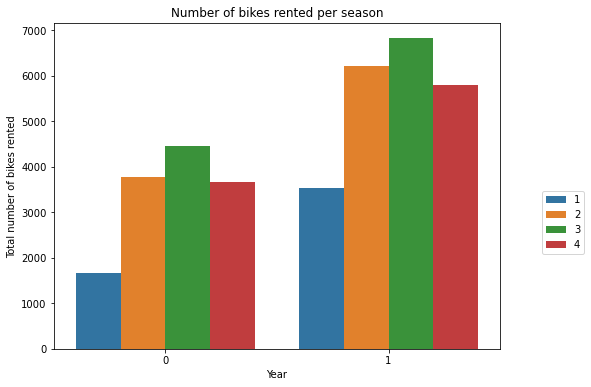

In [32]:
plt.figure(figsize=(8, 6))

sns.barplot('yr', 'cnt', hue = 'season', data = data, ci=None)

plt.legend(loc = 'upper right', bbox_to_anchor=(1.2,0.5))

plt.xlabel('Year')
plt.ylabel('Total number of bikes rented')

plt.title('Number of bikes rented per season')

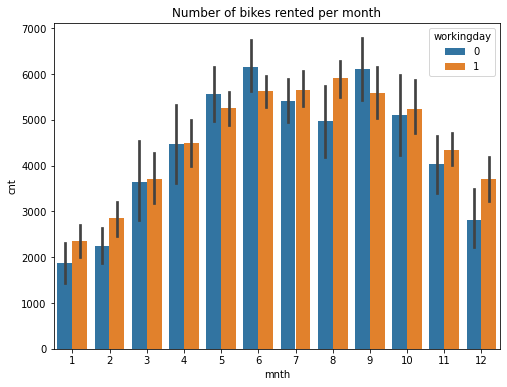

In [34]:
plt.figure(figsize=(8, 6))

sns.barplot(x = 'mnth', y = 'cnt', hue = 'workingday', data = data)

plt.title('Number of bikes rented per month')
plt.show()

Text(0, 0.5, 'Total number of bikes rented')

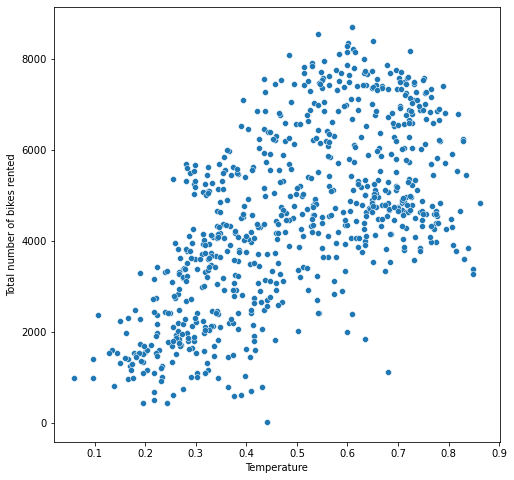

In [35]:
plt.figure(figsize=(8, 8))

fig = sns.scatterplot(x = 'temp', y = 'cnt', data = data)

plt.xlabel('Temperature')
plt.ylabel('Total number of bikes rented')

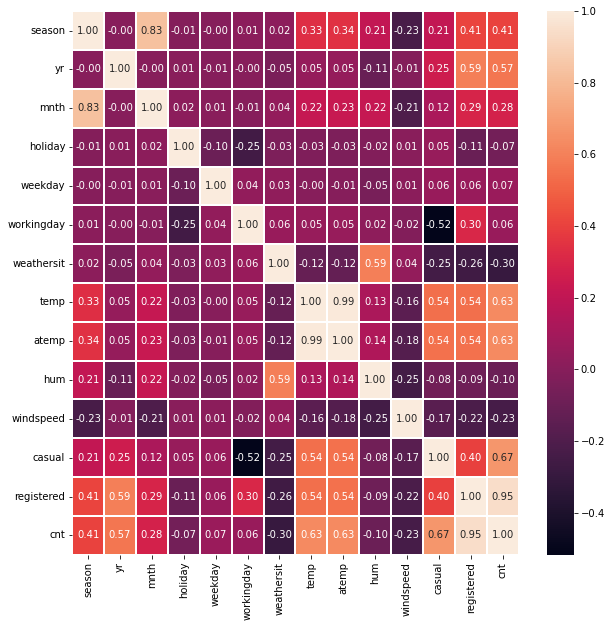

In [36]:
plt.figure(figsize=(10, 10))

sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt= '.2f')

plt.show()

In [37]:
data = pd.get_dummies(data, columns= ['season']) # Separates word classified features to multiple 1-0 features

data.sample(5)

,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,season_4
instant,,,,,,,,,,,,,,,,,,
315,2011-11-11,0,11,1,5,0,1,0.324167,0.306817,0.446250,0.314675,440,2928,3368,0,0,0,1
459,2012-04-03,1,4,0,2,1,1,0.466667,0.461483,0.396667,0.100133,1348,5424,6772,0,1,0,0
437,2012-03-12,1,3,0,1,1,1,0.466667,0.459592,0.489167,0.207713,838,4460,5298,1,0,0,0
368,2012-01-03,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671,89,2147,2236,1,0,0,0
470,2012-04-14,1,4,0,6,0,1,0.495000,0.487996,0.502917,0.190917,2795,4665,7460,0,1,0,0


In [39]:
# Choose Important features (Feature Engineering)
columns = ['registered', 'holiday', 'weekday', 
           'weathersit', 'temp', 'atemp',
           'season_1', 'season_2', 
           'season_3', 'season_4']


features = data[columns]


In [41]:
target = data[['cnt']]

In [42]:
target.head()

,cnt
instant,
1,985
2,801
3,1349
4,1562
5,1600


In [43]:
from sklearn.model_selection import train_test_split

In [48]:
# Seperate training and test
X_train, x_test, Y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2)
X_train_tensor = torch.tensor(X_train.values, dtype = torch.float)
x_test_tensor = torch.tensor(x_test.values, dtype = torch.float)

Y_train_tensor = torch.tensor(Y_train.values, dtype = torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype = torch.float)

print(X_train_tensor.shape, Y_train_tensor.shape)


torch.Size([584, 10]) torch.Size([584, 1])


In [49]:
import torch.utils.data as data_utils 

In [53]:
#Load Dataset Directly
train_data = data_utils.TensorDataset(X_train_tensor, Y_train_tensor) 

# Shuffle, Batch and Load data in parallel when using multiple loaders with DataLoader
train_loader = data_utils.DataLoader(train_data, batch_size=100, shuffle=True)
len(train_loader)

6

In [54]:
features_batch, target_batch = iter(train_loader).next()

print(features_batch.shape, target_batch.shape)


torch.Size([100, 10]) torch.Size([100, 1])


In [55]:
# Define NN parameters
inp = X_train_tensor.shape[1]
out = 1
hid = 10

# Loss Function
loss_fn = torch.nn.MSELoss()

# Architecture
model = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                            torch.nn.ReLU(),
                            torch.nn.Dropout(p=0.2),
                            torch.nn.Linear(hid, out))

# Optimizer 
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

C:\Users\lfcas\.conda\envs\Kidneys\lib\site-packages\torch\onnx\symbolic_opset9.py:1672: UserWarning: Dropout is a training op and should not be exported in inference mode. For inference, make sure to call eval() on the model and to export it with param training=False.
  warnings.warn("Dropout is a training op and should not be exported in inference mode. "


In [56]:
# Training
total_step = len(train_loader)

num_epochs = 10000

for epoch in range(num_epochs + 1):
    for i, (features, target) in enumerate(train_loader):
        
        output = model(features)
        loss = loss_fn(output, target)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        if epoch % 2000 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/10000], Step [1/6], Loss: 24318050.0000
Epoch [1/10000], Step [2/6], Loss: 20955526.0000
Epoch [1/10000], Step [3/6], Loss: 23604982.0000
Epoch [1/10000], Step [4/6], Loss: 23738632.0000
Epoch [1/10000], Step [5/6], Loss: 24175934.0000
Epoch [1/10000], Step [6/6], Loss: 27357110.0000
Epoch [2001/10000], Step [1/6], Loss: 3358043.0000
Epoch [2001/10000], Step [2/6], Loss: 3866229.5000
Epoch [2001/10000], Step [3/6], Loss: 3159688.7500
Epoch [2001/10000], Step [4/6], Loss: 4087214.0000
Epoch [2001/10000], Step [5/6], Loss: 2594382.5000
Epoch [2001/10000], Step [6/6], Loss: 4825756.0000
Epoch [4001/10000], Step [1/6], Loss: 2033759.2500
Epoch [4001/10000], Step [2/6], Loss: 3285716.5000
Epoch [4001/10000], Step [3/6], Loss: 2456464.7500
Epoch [4001/10000], Step [4/6], Loss: 2984373.5000
Epoch [4001/10000], Step [5/6], Loss: 2519915.7500
Epoch [4001/10000], Step [6/6], Loss: 2900681.5000
Epoch [6001/10000], Step [1/6], Loss: 2842987.5000
Epoch [6001/10000], Step [2/6], Loss: 27044

In [57]:
model.eval() # Change model to prediction mode (Oppesed to training mode)

with torch.no_grad():
    y_pred = model(x_test_tensor)

In [61]:
# Visualize sample
sample = x_test.iloc[45]
print(sample,'\n')

sample_tensor = torch.tensor(sample.values, 
                             dtype = torch.float)

with torch.no_grad():
    y_pred = model(sample_tensor)

print("Predicted count : ", (y_pred.item()))
print("Actual count : ", (y_test.iloc[45]))

registered    3197.000000
holiday          0.000000
weekday          0.000000
weathersit       2.000000
temp             0.696667
atemp            0.649000
season_1         0.000000
season_2         0.000000
season_3         1.000000
season_4         0.000000
Name: 611, dtype: float64 

Predicted count :  3547.347412109375
Actual count :  cnt    5810
Name: 611, dtype: int64


In [62]:
# Compare predictions to actual values
with torch.no_grad():
    y_pred_tensor = model(x_test_tensor)

y_pred = y_pred_tensor.detach().numpy()

print(y_pred.shape, y_test.values.shape)

# use a pandas dataframe
compare_df = pd.DataFrame({'actual': np.squeeze(y_test.values), 'predicted': np.squeeze(y_pred)})

compare_df.sample(10)


(147, 1) (147, 1)


,actual,predicted
24,2843,2819.424316
137,4792,4427.613281
11,5020,4567.063965
86,5202,4720.646484
75,1969,1716.488281
135,4978,4679.776367
68,6230,5567.790039
53,1005,1033.239502
131,1248,1160.116455
98,6779,6125.882324


In [63]:
# 3rd party scores
sklearn.metrics.r2_score(y_test, y_pred)


0.8386838772734904

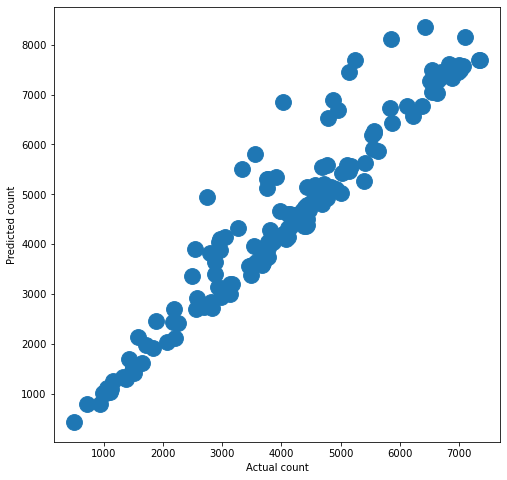

In [64]:
# plot
plt.figure(figsize=(8, 8))

plt.scatter(y_pred, y_test.values, s=250)

plt.xlabel("Actual count")
plt.ylabel("Predicted count")

plt.show()

## Saving and Loading a Trained Model

In [65]:
#Saving as a suffixless file at current directory (OG file directory)
torch.save(model, 'my_model') 
# Saves the class object with all its internal parameters

In [67]:
#Load Model
saved_model = torch.load('my_model')
y_pred_tensor = saved_model(x_test_tensor) 
y_pred = y_pred_tensor.detach().numpy()

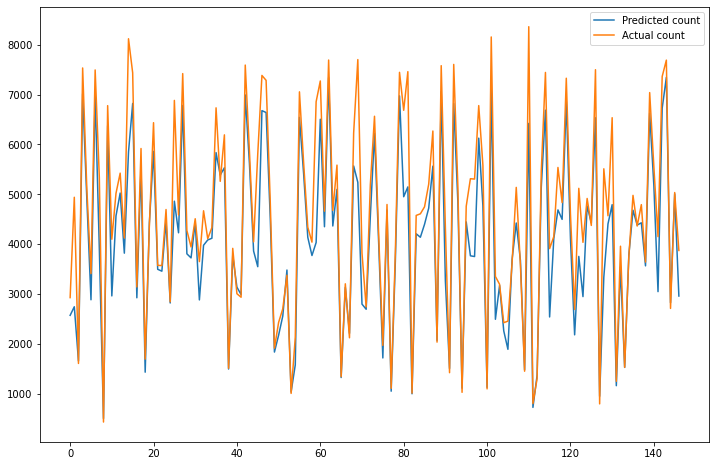

0.8386838772734904

In [69]:
plt.figure(figsize=(12, 8))

plt.plot(y_pred, label='Predicted count')
plt.plot(y_test.values, label='Actual count')

plt.legend()
plt.show()

sklearn.metrics.r2_score(y_test.values, y_pred)
